Klassifikation bruges til at opdele data i forskellige grupper eller klasser. Målet er at finde mønstre i dataene, så vi kan klassificere nye data i de rigtige kategorier. Klassifikationsmodeller bruges, når resultatet (eller afhængig variabel) er kategorisk – det betyder, at det kan være en af et bestemt antal kategorier eller klasser.

For eksempel:

E-mails: Er en e-mail spam eller ikke-spam?
Diagnoser: Har en patient en bestemt sygdom eller ej?
Kreditvurdering: Er en låneansøger høj risiko eller lav risiko?

In [4]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Eksempeldata: alder, indkomst og om de køber (1 = ja, 0 = nej)
data = np.array([[22, 30000, 0],
                 [25, 48000, 0],
                 [47, 60000, 1],
                 [52, 75000, 1],
                 [46, 35000, 0],
                 [56, 52000, 1]])

# Uafhængige variabler (alder og indkomst)
X = data[:, :2]

# Afhængig variabel (køb: ja/nej)
y = data[:, 2]

# Opret og træn logistisk regressionsmodel
model = LogisticRegression()
model.fit(X, y)

# Forudsige om en person på 30 år med en indkomst på 40000 køber
ny_person = np.array([[30, 40000]])
køb_sandsynlighed = model.predict_proba(ny_person)[0, 1]
print(f"Sandsynligheden for at personen køber produktet er: {køb_sandsynlighed:.2f}")


Sandsynligheden for at personen køber produktet er: 0.00


på en anden mode ved brug af decision tre

In [5]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Eksempeldata: alder, indkomst og om de køber (1 = ja, 0 = nej)
data = np.array([[22, 30000, 0],
                 [25, 48000, 0],
                 [47, 60000, 1],
                 [52, 75000, 1],
                 [46, 35000, 0],
                 [56, 52000, 1]])

# Uafhængige variabler (alder og indkomst)
X = data[:, :2]

# Afhængig variabel (køb: ja/nej)
y = data[:, 2]

# Opret og træn beslutningstræet
model = DecisionTreeClassifier()
model.fit(X, y)

# Forudsige om en person på 30 år med en indkomst på 40000 køber
ny_person = np.array([[30, 40000]])
køb_forudsigelse = model.predict(ny_person)

print("Forudsigelse for om personen køber:", "Ja" if køb_forudsigelse[0] == 1 else "Nej")


Forudsigelse for om personen køber: Nej


visualisering af beslutning tre

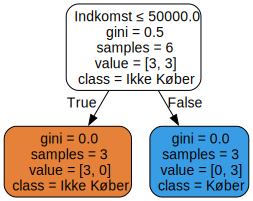

In [6]:
from sklearn.tree import export_graphviz
import graphviz

# Eksporter træet til en grafisk repræsentation
dot_data = export_graphviz(model, out_file=None, 
                           feature_names=['Alder', 'Indkomst'],  
                           class_names=['Ikke Køber', 'Køber'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")  # Gemmer filen som "decision_tree.pdf"
graph  # Viser grafen i notebooken
